In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# return x_min, f(x_min), num_of_func_calculations

# метод перебора
def enumeration(f, a, b, eps):
    mesh = np.linspace(a, b, int((b - a) / eps) + 1)
    f_values = f(mesh)
    index_of_min = np.argmin(f_values)   
    return mesh[index_of_min], f_values[index_of_min], len(mesh)
    
# метод поразрядного поиска
def bitwise_search(f, a, b, eps):
    x = a
    f_val = f(x)
    delta = (b - a) / 4
    backward_direction = False
    counter = 1

    while True:
        while True:
            if x < a or x > b:
                break
            f_min = f_val
            x += (-1)**int(backward_direction) * delta
            f_val = f(x)
            counter += 1
            if f_val > f_min:
                break
                
        if delta < eps or x < a or x > b:
            x_min = x - (-1)**int(backward_direction) * delta
            break
    
        delta /= 4
        backward_direction = not backward_direction
        
    return x_min, f_val, counter
    
# метод дихотомии
def dichotomy(f, a, b, eps):      
    counter = 0
    delta = 1 * eps
    while eps < (b - a) / 2:
        x_1 = (b + a - delta) / 2
        x_2 = (b + a + delta) / 2
        
        if f(x_1) <= f(x_2):
            b = x_2
        else:
            a = x_1
            
        counter += 2
        
    return (a + b) / 2, f((a + b) / 2), counter
    
# метод золотого сечения
def golden_section_search(f, a, b, eps):
    tau = (np.sqrt(5) - 1) / 2
    x_1 = b - tau * (b - a)
    x_2 = a + tau * (b - a)
    f_1 = f(x_1)
    f_2 = f(x_2)
    counter = 2
    
    while eps < (b - a)/2: 
        if f_1 <= f_2:
            b = x_2
            x_2 = x_1
            f_2 = f_1
            x_1 = b - tau * (b - a)
            f_1 = f(x_1)
        else:
            a = x_1
            x_1 = x_2
            f_1 = f_2
            x_2 = a + tau * (b - a)
            f_2 = f(x_2)
            
        counter += 1
        
    return (a + b) / 2, f((a + b) / 2), counter
    
# метод парабол
def parabolic(f, a, b, eps):
    x_1, x_2, x_3 = a, (b + a) / 2, b
    f_1, f_2, f_3 = f(x_1), f(x_2), f(x_3)
    counter = 3
    while f_2 - f_1 > eps or f_2 - f_3 > eps:
        if f_2 - f_1 > eps:
            x_2 -= (x_2 + x_1) / 2
        else:
            x_2 += (x_2 + x_3) / 2
            
        f_2 = f(x_2)
        counter += 1
    
    minimals = []
    while len(minimals) < 2 or abs(minimals[-1] - minimals[-2]) > eps:
        a_1 = (f_2 - f_1) / (x_2 - x_1)
        a_2 = ((f_3 - f_1) / (x_3 - x_1) - a_1) / (x_3 - x_2)
        x_min = (x_1 + x_2 - a_1 / a_2) / 2
        minimals.append(x_min)
        f_min = f(x_min)
        counter += 1
        
        if x_2 < x_min and f_2 < f_min:
            x_3 = x_min
            f_3 = f_min
        elif x_2 < x_min and f_2 >= f_min:
            x_1 = x_2
            f_1 = f_2
            x_2 = x_min
            f_2 = f_min
        elif x_2 >= x_min and f_2 < f_min:
            x_1 = x_min
            f_1 = f_min
        else:
            x_3 = x_2
            f_3 = f_2
            x_2 = x_min
            f_2 = f_min

    return x_min, f_min, counter





# производная по центральной разностной схеме
def diff(func, x_0, h = 0.001):
    if h < 10**-12:
        h = 10**-12
    return (func(x_0 + h) - func(x_0 - h)) / (2 * h)

# обсчет первых двух производных по центральным схемам (для сокращения количества обсчетов функции)
def two_diffs(func, x_0, h = 0.001):
    f_2 = func(x_0 + h)
    f_0 = func(x_0 - h)
    return (f_2 - f_0) / (2 * h), (f_2 - 2 * func(x_0) + f_0) / h**2

# метод средней точки
def midpoint(f, a, b, eps, derivative = None):
    der_val = 2 * eps
    counter = 0
    
    while abs(der_val) > eps:
        x_min = (b + a) / 2
        
        if derivative is None:
            der_val = diff(f, x_min, min(0.001, (b - a) / 1000))
            counter += 2
        else:
            der_val = derivative(x_min)
            counter += 1

        if der_val > 0:
            b = x_min
        else:
            a = x_min

    return x_min, f(x_min), counter

# метод хорд
def chord(f, a, b, eps, derivative=None):
    if derivative is None:
        der_val_a = diff(f, a, min(0.001, (b - a) / 1000))
        der_val_b = diff(f, b, min(0.001, (b - a) / 1000))
        counter = 4
    else:
        der_val_a = derivative(a)
        der_val_b = derivative(b)
        counter = 2

    while True:
        x_min = a + der_val_a / (der_val_a - der_val_b) * (b - a)
        if derivative is None:
            der_val = diff(f, x_min, min(0.001, (b - a) / 1000))
            counter += 2
        else:
            der_val = derivative(x_min)
            counter += 1
            
        if abs(der_val) <= eps:
            break
            
        if der_val < 0:
            a = x_min
            der_val_a = der_val
        else:
            b = x_min
            der_val_b = der_val
    
    return x_min, f(x_min), counter

# метод Ньютона
# f - функция, минимум которой ищется на заданном отрезке
# a - начало отрезка
# b - конец отрезка
# eps - заданная точность
# first_derivative - функция для первой производной (если не задана, используется разностная схема)
# second_derivative - функция для второй производной (если не задана, используется разностная схема)
# raphson - флаг, который отвечает за применение метода Ньютона-Рафсона
# raphson_const - параметр для метода Ньютона-Рафсона (если он лежит в диапазоне (0, 1], то он используется в
#     качестве константного значения этого параметра, в ином же случае параметр будет расчитываться динамически
# marquardt - флаг, который отвечает за применение метода Марквардта
# marquardt_multiplier - параметр, отвечающий за скалирование второй производной для начального значения 
#     специального параметра в этом методе (если он будет меньше 10, что является минимумом, то будет использоваться 20)
# max_iter - максимальное количество итераций
def newton(f, a, b, x_0, eps, first_derivative = None, second_derivative = None, 
           raphson = False, raphson_const = -1, marquardt = False, marquardt_multiplier = 20, max_iter = 100):
    iteration = 0
    counter = 0

    # вычисление первой и второй производной в первый раз
    if first_derivative is None and second_derivative is None:
        der_val, second_der_val = two_diffs(f, x_0, min(0.001, (b - a) / 1000))
    elif first_derivative is None:
        der_val = first_derivative(x_0)
        second_der_val = diff(first_derivative, x_0, min(0.001, (b - a) / 1000))
    elif second_derivative is None:
        der_val = diff(f, x_0, min(0.001, (b - a) / 1000))
        second_der_val = second_derivative(x_0)
    else:
        der_val = first_derivative(x_0)
        second_der_val = second_derivative(x_0)
        counter -= 1
    counter += 3

    # определение начальных параметров для метода Ньютона-Рафсона
    is_raphson_const = True
    if raphson: 
        if 0 < raphson_const <= 1: t = raphson_const
        else: is_raphson_const = False
    else: t = 1

    # определение начальных параметров для метода Марквардта
    if marquardt:
        if marquardt_multiplier < 10: marquardt_multiplier = 20
        mu = marquardt_multiplier * abs(second_der_val)
    else: mu = 0

    # основной цикл
    x_new = x_0
    while eps < abs(der_val):
        iteration += 1

        # вычисление значения для метода Марквардта
        if marquardt and iteration > 1:
            f_old = f(x_old)
            f_new = f(x_new)
            counter += 2
            if f_new < f_old: mu /= 2
            else: mu *= 2
        
        x_old = x_new

        # вычисление значения для метода Ньютона-Рафсона
        if not is_raphson_const:
            x_raph = x_old - der_val / second_der_val            
            if first_derivative is None:
                raph_der = diff(f, x_raph, min(0.001, (b - a) / 1000))
                counter += 2
            else:
                raph_der = first_derivative(x_raph)
                counter += 1                
            t = der_val**2 / (der_val**2 + raph_der**2)
        
        # новое приближение
        x_new = x_old - t * der_val / (second_der_val + mu)

        #print("NEW x_n =", x_new)
        # вычисление производных для нового приближения
        if first_derivative is None and second_derivative is None:
            der_val, second_der_val = two_diffs(f, x_new, min(0.001, (b - a) / 1000))
        elif first_derivative is None:
            der_val = first_derivative(x_new)
            second_der_val = diff(first_derivative, x_new, min(0.001, (b - a) / 1000))
        elif second_derivative is None:
            der_val = diff(f, x_new, min(0.001, (b - a) / 1000))
            second_der_val = second_derivative(x_new)
        else:
            der_val = first_derivative(x_new)
            second_der_val = second_derivative(x_new)
            counter -= 1
        counter += 3

        # ОЧЕНЬ ПЕЧАЛЬНО =(
        if iteration > max_iter:
            print("Method doesn't converge from current start point!")
            return None
            
    return x_new, f(x_new), counter

# метод перебора (для многомодальных)
def enumeration_multi(f, a, b, L, eps):
    mesh = np.linspace(a, b, int(L * (b - a) / (2 * eps)) + 1)
    f_values = f(mesh)
    index_of_min = np.argmin(f_values)   
    return mesh[index_of_min], f_values[index_of_min], len(mesh)
    

# метод ломаных
def broken_lines(f, a, b, L, eps):
    f_a = f(a)
    f_b = f(b)
    counter = 2
    
    minima = [((f_a - f_b + L * (b + a)) / (2 * L), (f_a + f_b - L * (b - a)) / 2)]
    while True:
        minima.sort(key = lambda point: point[1])
        f_min = f(minima[0][0])
        counter += 1
        delta = (f_min - minima[0][1]) / (2 * L)

        if 2 * L * delta < eps:
            break
        
        x_1 = minima[0][0] - delta
        x_2 = minima[0][0] + delta
        new_minima = (f_min + minima[0][1]) / 2
        minima.pop(0)
        minima.append((x_1, new_minima))
        minima.append((x_2, new_minima))
        
    return minima[0][0], f_min, counter

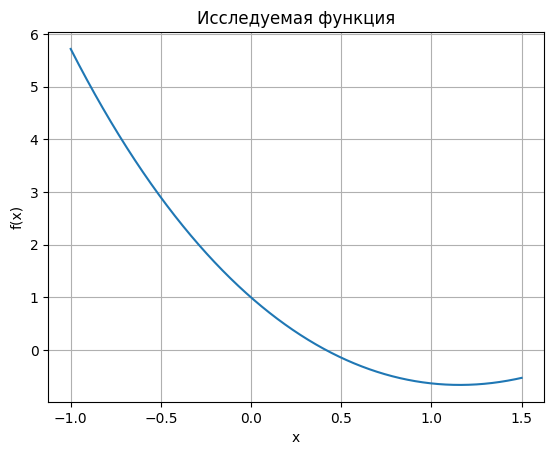

In [3]:
function = lambda x: x**2 - 2 * x + np.exp(-x)
#derivative = lambda x: 2 * x - 2 - np.exp(-x)
a, b = -1, 1.5

x = np.linspace(a, b, 10001)
plt.plot(x, function(x))
plt.title("Исследуемая функция")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

In [4]:
digits = 8

precisions = [10**(-i) for i in range(1, digits + 1)]
method_names = ["Метод перебора", "Метод поразрядного поиска", "Метод дихотомии", "Метод золотого сечения", "Метод парабол", "Метод средней точки", "Метод хорд", "Метод Ньютона"]
methods = [enumeration, bitwise_search, dichotomy, golden_section_search, parabolic, midpoint, chord, newton]
starting_points = [a, b, (b + a) / 2]

for i in range(len(method_names)):
    if method_names[i] != "Метод Ньютона":
        print(method_names[i])
        table = []
        for eps in precisions:
            x_min, f_min, f_calls = methods[i](function, a, b, eps)
            table.append([eps, x_min, f_min, f_calls])
        print(tabulate(table, headers=["Precision", "x_min", "f_min", "f calls"], tablefmt='orgtbl', floatfmt=f".{digits}f"))
    else:
        for x_0 in starting_points:
            print(f"{method_names[i]} (x_0 = {x_0})")
            table = []
            for eps in precisions:
                x_min, f_min, f_calls = methods[i](function, a, b, x_0, eps)
                table.append([eps, x_min, f_min, f_calls])
            print(tabulate(table, headers=["Precision", "x_min", "f_min", "f calls"], tablefmt='orgtbl', floatfmt=f".{digits}f"))
            print()
    print()

Метод перебора
|   Precision |      x_min |       f_min |   f calls |
|-------------+------------+-------------+-----------|
|  0.10000000 | 1.20000000 | -0.65880579 |        26 |
|  0.01000000 | 1.16000000 | -0.66091382 |       251 |
|  0.00100000 | 1.15700000 | -0.66092295 |      2501 |
|  0.00010000 | 1.15720000 | -0.66092299 |     25001 |
|  0.00001000 | 1.15718863 | -0.66092299 |    250000 |
|  0.00000100 | 1.15718500 | -0.66092299 |   2500001 |
|  0.00000010 | 1.15718500 | -0.66092299 |  25000001 |
|  0.00000001 | 1.15718495 | -0.66092299 | 250000001 |

Метод поразрядного поиска
|   Precision |      x_min |       f_min |   f calls |
|-------------+------------+-------------+-----------|
|  0.10000000 | 1.14843750 | -0.65986098 |        12 |
|  0.01000000 | 1.15820312 | -0.66083441 |        16 |
|  0.00100000 | 1.15698242 | -0.66092222 |        28 |
|  0.00010000 | 1.15717316 | -0.66092299 |        38 |
|  0.00001000 | 1.15718269 | -0.66092299 |        44 |
|  0.00000100 | 1.15718

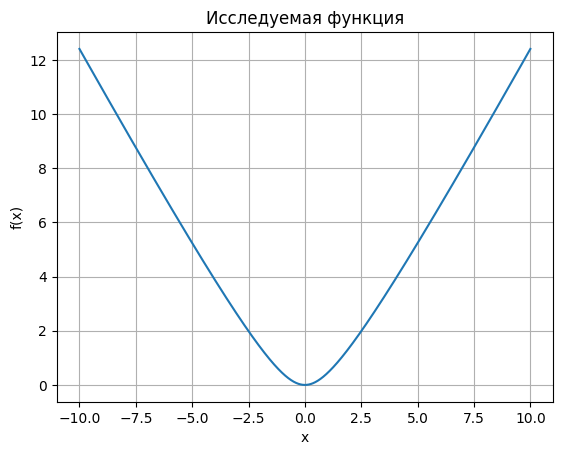

In [5]:
function = lambda x: x * np.arctan(x) - np.log(1 + x**2) / 2
deriv_1 = lambda x: np.arctan(x)
deriv_2 = lambda x: 1 / (x**2 + 1)
a, b = -10, 10

x = np.linspace(a, b, 10001)
plt.plot(x, function(x))
plt.title("Исследуемая функция")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

In [6]:
import warnings
warnings.filterwarnings("ignore")

N = 1000

x = np.linspace(0, 5, N)
for i in range(N):
    x_min, _, __ = newton(function, a, b, x[i], eps, first_derivative = deriv_1, second_derivative = deriv_2)
    if np.isnan(x_min):
        break
conv_interval = (-x[i - 1], x[i - 1])
print(f"Интервал сходимости: ({conv_interval[0]}, {conv_interval[1]})")

Интервал сходимости: (-1.3913913913913913, 1.3913913913913913)


In [7]:
starting_points = [b, conv_interval[1] + 0.5, conv_interval[1] / 2]



eps = 0.000001
for x_0 in starting_points:
    table = []
    x_min, f_min, f_calls = newton(function, a, b, x_0, eps, first_derivative = deriv_1, second_derivative = deriv_2)
    table.append(["Simple", x_min, f_calls])
    x_min, f_min, f_calls = newton(function, a, b, x_0, eps, first_derivative = deriv_1, second_derivative = deriv_2, raphson = True)
    table.append(["Raphson", x_min, f_calls])
    x_min, f_min, f_calls = newton(function, a, b, x_0, eps, first_derivative = deriv_1, second_derivative = deriv_2, marquardt = True)
    table.append(["Marquardt", x_min, f_calls])
    x_min, f_min, f_calls = newton(function, a, b, x_0, eps, first_derivative = deriv_1, second_derivative = deriv_2, raphson = True, marquardt = True)
    table.append(["Both", x_min, f_calls])
    
    print(f"Начальная точка x_0 = {x_0}")
    print(tabulate(table, headers=["Method", "x_min", "f calls"], tablefmt='orgtbl', floatfmt=".8f"))
    print()

Начальная точка x_0 = 10
| Method    |        x_min |   f calls |
|-----------+--------------+-----------|
| Simple    | nan          |        22 |
| Raphson   | nan          |        32 |
| Marquardt |   0.00000010 |        32 |
| Both      |   0.00000011 |        30 |

Начальная точка x_0 = 1.8913913913913913
| Method    |        x_min |   f calls |
|-----------+--------------+-----------|
| Simple    | nan          |        26 |
| Raphson   |  -0.00000029 |        11 |
| Marquardt |   0.00000016 |        36 |
| Both      |   0.00000052 |        45 |

Начальная точка x_0 = 0.6956956956956957
| Method    |       x_min |   f calls |
|-----------+-------------+-----------|
| Simple    | -0.00000013 |         8 |
| Raphson   | -0.00000000 |        11 |
| Marquardt |  0.00000078 |        40 |
| Both      |  0.00000082 |        50 |



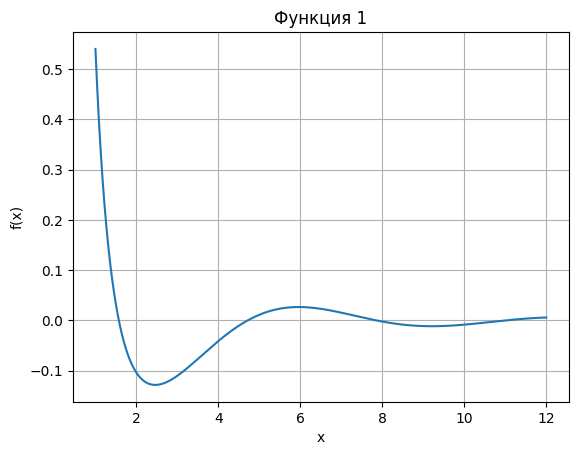

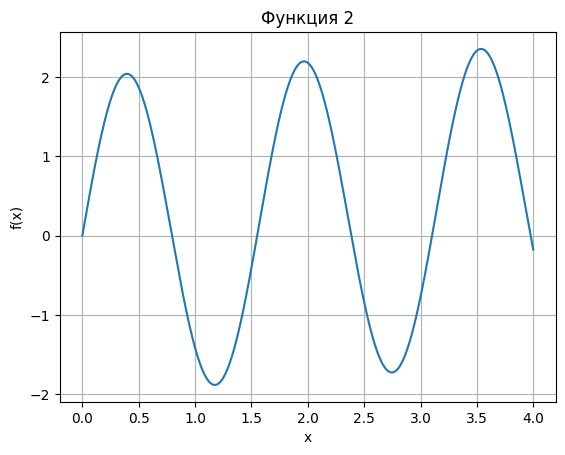

In [8]:
functions = [lambda x: np.cos(x) / x**2, lambda x: x / 10 + 2 * np.sin(4 * x)]
function_names = [f"Функция {i + 1}" for i in range(len(functions))]
intervals = [(1, 12), (0, 4)]

for i in range(len(functions)):
    a, b = intervals[i]
    x = np.linspace(a, b, 10001)
    
    plt.figure()
    plt.plot(x, functions[i](x))
    plt.title(function_names[i])
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)

In [9]:
digits = 6

precisions = [10**(-i) for i in range(digits + 1)]
method_names = ["Метод перебора", "Метод ломанных"]
methods = [enumeration_multi, broken_lines]

N = 5
L = []
for i in range(len(function_names)):
    a, b = intervals[i]  
    x = np.linspace(a, b, N)
    L.append(max(abs(diff(functions[i], x, 10**-8))))

for j in range(len(function_names)):
    a, b = intervals[j]
    for i in range(len(method_names)):
        print(f"{method_names[i]}, {function_names[j]}")
        
        table = []
        for eps in precisions:
            x_min, f_min, f_calls = methods[i](functions[j], a, b, L[j], eps)
            table.append([eps, x_min, f_min, f_calls])
                
        print(tabulate(table, headers=["Precision", "x_min", "f_min", "f calls"], tablefmt='orgtbl', floatfmt=f".{digits}f"))
        print()

Метод перебора, Функция 1
|   Precision |    x_min |     f_min |   f calls |
|-------------+----------+-----------+-----------|
|    1.000000 | 2.100000 | -0.114478 |        11 |
|    0.100000 | 2.466667 | -0.128320 |       106 |
|    0.010000 | 2.456954 | -0.128325 |      1058 |
|    0.001000 | 2.458897 | -0.128325 |     10572 |
|    0.000100 | 2.458738 | -0.128325 |    105715 |
|    0.000010 | 2.458716 | -0.128325 |   1057142 |
|    0.000001 | 2.458714 | -0.128325 |  10571416 |

Метод ломанных, Функция 1
|   Precision |    x_min |     f_min |   f calls |
|-------------+----------+-----------+-----------|
|    1.000000 | 1.661210 | -0.032719 |        18 |
|    0.100000 | 2.354692 | -0.127340 |        80 |
|    0.010000 | 2.457319 | -0.128325 |       224 |
|    0.001000 | 2.458838 | -0.128325 |       658 |
|    0.000100 | 2.458724 | -0.128325 |      1698 |
|    0.000010 | 2.458710 | -0.128325 |      4662 |
|    0.000001 | 2.458714 | -0.128325 |     18402 |

Метод перебора, Функция 2
| 